In [131]:
# Importing the Essential Libraries, Metrics

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import string
import warnings
warnings.filterwarnings('ignore')

# Read and Understand data

In [132]:
train_data = pd.read_csv('training.1600000.processed.noemoticon.csv',encoding='latin',header=None)
train_data.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [133]:
train_data = train_data.rename(columns={0:'target',1:'id',2:'date',3:'query',4:'username',5:'content'})

In [134]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   target    1600000 non-null  int64 
 1   id        1600000 non-null  int64 
 2   date      1600000 non-null  object
 3   query     1600000 non-null  object
 4   username  1600000 non-null  object
 5   content   1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [135]:
train_data.describe()

,target,id
count,1.600000e+06,1.600000e+06
mean,2.000000e+00,1.998818e+09
std,2.000001e+00,1.935761e+08
min,0.000000e+00,1.467810e+09
25%,0.000000e+00,1.956916e+09
50%,2.000000e+00,2.002102e+09
75%,4.000000e+00,2.177059e+09
max,4.000000e+00,2.329206e+09


# Visualize missing values

In [136]:
train_data.isnull().sum()

target      0
id          0
date        0
query       0
username    0
content     0
dtype: int64

In [137]:
train_data.duplicated().sum()

0

In [138]:
train_data.nunique()

target            2
id          1598315
date         774363
query             1
username     659775
content     1581466
dtype: int64

In [139]:
train_data[train_data['target']==0]['content'].head()

0    @switchfoot http://twitpic.com/2y1zl - Awww, t...
1    is upset that he can't update his Facebook by ...
2    @Kenichan I dived many times for the ball. Man...
3      my whole body feels itchy and like its on fire 
4    @nationwideclass no, it's not behaving at all....
Name: content, dtype: object

In [140]:
train_data[train_data['target']==4]['content'].head()

800000         I LOVE @Health4UandPets u guys r the best!! 
800001    im meeting up with one of my besties tonight! ...
800002    @DaRealSunisaKim Thanks for the Twitter add, S...
800003    Being sick can be really cheap when it hurts t...
800004      @LovesBrooklyn2 he has that effect on everyone 
Name: content, dtype: object

In [141]:
train_data['target'] = train_data['target'].replace([0,4],['Negative','Positive'])

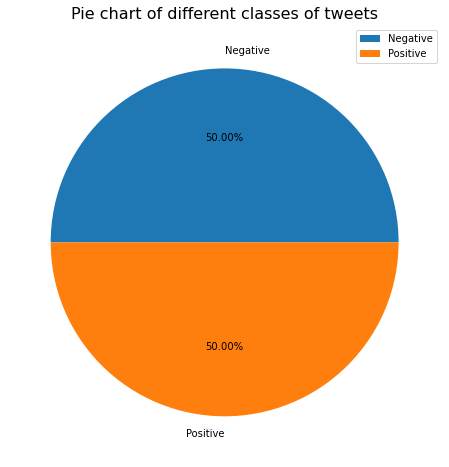

In [37]:
figure = plt.figure(figsize=(12,8))
targets = train_data.groupby('target').size()
targets.plot(kind='pie',  figsize=(10, 8), autopct = "%.2f%%" )
plt.title("Pie chart of different classes of tweets",fontsize=16)
plt.ylabel("")
plt.legend()
plt.show()

In [142]:
train_data['length'] = train_data.content.str.split().apply(len)

In [143]:
train_data['length']

0          19
1          21
2          18
3          10
4          21
           ..
1599995    11
1599996    11
1599997    11
1599998    12
1599999     5
Name: length, Length: 1600000, dtype: int64

Text(0.5, 0.98, 'Distribution of text length for positive sentiment tweets.')

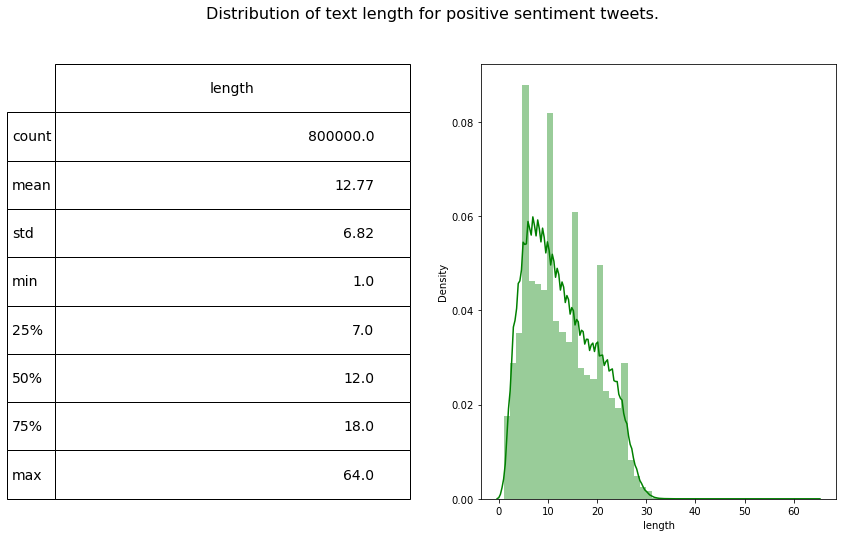

In [51]:
fig = plt.figure(figsize=(14,8))



ax2 = fig.add_subplot(122)
sns.distplot(train_data[train_data['target']=='Positive']['length'], ax=ax2,color='green')
describe = train_data.length[train_data.target=='Positive'].describe().to_frame().round(2)




ax1 = fig.add_subplot(121)
ax1.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]

table = ax1.table(cellText = describe.values, rowLabels = describe.index,  bbox=bbox, colLabels=describe.columns )
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for positive sentiment tweets.', fontsize=16)

plt.show()

# drop columns

In [144]:
train_data.drop(['id','date','query','username','length'], axis=1, inplace=True)

In [145]:
train_data['target'] = train_data['target'].replace(['Negative','Positive'],[0,1])

In [146]:
train_data.head()

,target,content
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


# NLP

In [147]:
import nltk
from nltk.corpus import stopwords as sw
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re

In [148]:
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('omw-1.4')

In [149]:
print(sw.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [150]:
# ws = WordNetLemmatizer()
# corpus = []

# for i in range(0,len(train_data)):
#     news = re.sub('[^a-zA-Z]', ' ',train_data['content'][i])
#     news = news.lower()
#     news = news.split()
    
#     news = [ws.lemmatize(word) for word in news if not word in sw.words('english')]
#     news = ' '.join(news)
#     corpus.append(news)

In [151]:
# corpus

In [152]:
# cv = CountVectorizer(max_features=5000)
# x = cv.fit_transform(corpus).toarray()

In [153]:
# x.shape

In [154]:
# y = tra['label'].iloc[:].values

In [155]:
# y.shape

In [156]:
def text_cleaning(text):
    text = re.sub(r'@[A-Za-z0-9]+', '',text)
    text = re.sub(r'@[A-Za-zA-Z0-9]+', '',text)
    text = re.sub(r'@[A-Za-z]+', '',text)
    text = re.sub(r'@[-)]+', '',text)
    text = re.sub(r'#', '',text)
    text = re.sub(r'RT[\s]+', '',text)
    text = re.sub(r'http?\/\/\S+', '',text)
    text = re.sub(r'&[a-z;]+', '',text)
    
    return text

In [157]:
train_data['content'] = train_data['content'].apply(text_cleaning)

In [158]:
train_data.head(10)

,target,content
0,0,"http://twitpic.com/2y1zl - Awww, that's a bum..."
1,0,is upset that he can't update his Facebook by ...
2,0,I dived many times for the ball. Managed to s...
3,0,my whole body feels itchy and like its on fire
4,0,"no, it's not behaving at all. i'm mad. why am..."
5,0,not the whole crew
6,0,Need a hug
7,0,"hey long time no see! Yes.. Rains a bit ,onl..."
8,0,_K nope they didn't have it
9,0,que me muera ?


# train test split

In [159]:
from sklearn.model_selection import train_test_split

In [76]:
# x = train_data.iloc[: , 1:2].values

In [77]:
# y = train_data.iloc[:,:1].values

In [160]:
x = train_data['content'].values
y = train_data['target'].values

In [163]:
x_train , x_test ,y_train, y_test = train_test_split(x , y,test_size=0.25)

In [164]:
print('Content',x_train[123])
print('target',y_train[963])

Content   ill make up all the lost time I am causeing...
target 1


# converting the strings into integers using Tokenizer

In [165]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [166]:
# x_train = np.array(x_train)

# Instantiating the tokenizer

In [167]:
max_vocab = 200000
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(x_train)

# checking the word index and find out the vocabulary of the dataset

In [168]:
wordidx = tokenizer.word_index
V = len(wordidx) 
print('the size of dataset vocab is', V)

the size of dataset vocab is 317592


# converting train and test sentences into sequences

In [169]:
train_seq = tokenizer.texts_to_sequences(x_train)
test_seq = tokenizer.texts_to_sequences(x_test)
print('Training sequence:', train_seq[0])
print('testing sequence:',test_seq[0])

Training sequence: [13, 3, 128, 2, 9263, 6300, 884, 484, 7089]
testing sequence: [255, 57, 132, 126, 4, 2183, 27]


In [170]:
#padding the sequences to get equal length sequence because its conventional to use same size sequence
# padding the training sequence

pad_train = pad_sequences(train_seq)
T = pad_train.shape[1]
print('The length of training sequence is:',T)

The length of training sequence is: 51


In [171]:
# padding the test sequence

pad_test = pad_sequences(test_seq,maxlen=T)
print('The length of testing sequence is:',pad_test.shape[1])

The length of testing sequence is: 51


# Model Building

In [173]:
from tensorflow.keras.layers import Input , Dense ,Embedding ,GlobalAveragePooling1D ,LSTM
from tensorflow.keras.models import Model

In [175]:
D = 20    # used for dimension of embedding layer
M = 15    # used for dimension of LSTM layers

i = Input(shape=(T ,))
X = Embedding(V+1 ,D)(i)     # V+1 bcoz the indexing of the words in vocab (V) start from 1 not 0
X = LSTM(M , return_sequences= True)(X)
X = GlobalAveragePooling1D()(X)
X = Dense(32 ,activation='relu')(X)
X = Dense(1, activation='sigmoid')(X)

model = Model(i,X)

2022-08-03 16:11:57.221802: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 25407440 exceeds 10% of free system memory.
2022-08-03 16:11:57.447858: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 25407440 exceeds 10% of free system memory.


In [176]:
# compiling the model

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [178]:
# training the model

history = model.fit(pad_train, y_train,validation_data=(pad_test,y_test),epochs=2)

Epoch 1/2
37500/37500 [==============================] - 3675s 98ms/step - loss: 0.4215 - accuracy: 0.8068 - val_loss: 0.3930 - val_accuracy: 0.8225
Epoch 2/2
37500/37500 [==============================] - 3284s 88ms/step - loss: 0.3652 - accuracy: 0.8379 - val_loss: 0.3876 - val_accuracy: 0.8254


In [179]:
# Evaluating the model 
# plotting the loss and validation loss of the model

plt.plot(model.history['loss'],label='loss')
plt.plot(model.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

TypeError: 'History' object is not subscriptable

In [180]:
# plotting the accuracy and validation accuracy of the model

plt.plot(model.history['accuracy'],label='accuracy')
plt.plot(model.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

TypeError: 'History' object is not subscriptable

In [183]:
# predicting the sentiment of any text

def predict_sentiment(text):
    #preproceesing the given text
    text_seq = tokenizer.texts_to_sequences(text)
    text_pad = pad_sequences(text_seq,maxlen=T)
    
    # predicting the class 
    predicted_sentiment = model.predict(text_pad).round()
    
    if predicted_sentiment == 1.0:
        return(print('It is a positive sentiment'))
    else:
        return(print('It is a negative sentiment'))
    
text = ['I feel happy']
predict_sentiment(text)

1/1 [==============================] - 0s 334ms/step
It is a positive sentiment


In [184]:
# saving the model for future purpose
# 1. pickle file
# 2. HDFS file

# model.save('sentiment analysis.h5')  ===> creates HDFS file for model